# Advanced Stats

array([[<Axes: title={'center': '0'}>]], dtype=object)

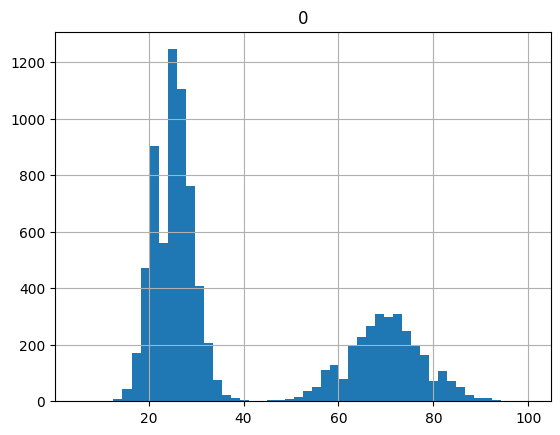

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
np.random.seed(1234)
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
breaks = np.concatenate((long_breaks, short_breaks))
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

array([[<Axes: title={'center': '0'}>]], dtype=object)

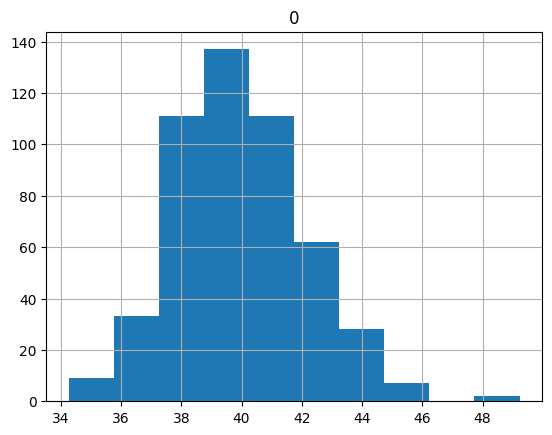

In [2]:
point_estimates = []
for x in range(500): # Generate 500 samples
    sample = np.random.choice(a= breaks, size=100)
#take a sample of 100 points
    point_estimates.append( sample.mean() )
# add the sample mean to our list of point estimates
pd.DataFrame(point_estimates).hist()
# look at the distribution of our sample

array([[<Axes: title={'center': '0'}>]], dtype=object)

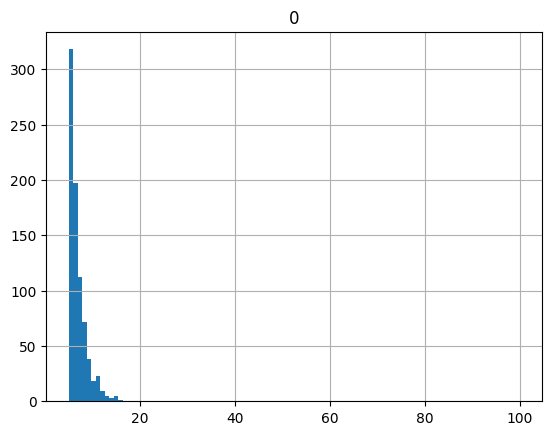

In [3]:
# Question convert this to Normal distribution with CLT
np.random.seed(42)
population = np.random.exponential(scale=2, size=10000)  # Population of size 10,000
pd.DataFrame(population).hist(bins=100,range=(5,100))

In [4]:
import math

sample_size = 100
# the size of the sample we wish to take
sample = np.random.choice(a= breaks, size = sample_size)
# a sample of sample_size taken from the 9,000 breaks population from before
sample_mean = sample.mean()
# the sample mean of the break lengths sample
sample_stdev = sample.std()
# sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)
# population standard deviation estimate


stats.t.interval(confidence = 0.95, # Confidence level 95%
                 df= sample_size - 1, # Degrees of freedom
                 loc = sample_mean, # Sample mean
                scale = sigma) # Standard deviation


## Actual population mean 39.99

(np.float64(35.07012416753715), np.float64(43.469875832462854))

In [5]:
# function to make confidence interval
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice(a= breaks, size = sample_size)
    sample_mean = sample.mean()
    # sample mean
    sample_stdev = sample.std()
    # sample standard deviation
    sigma = sample_stdev/math.sqrt(sample_size)
    # population Standard deviation estimate
    return stats.t.interval(confidence= 0.95, df= sample_size - 1, loc =
    sample_mean, scale = sigma)

times_in_interval = 0.

for i in range(1000):
    interval = makeConfidenceInterval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
    # if 39.99 falls in the interval
        times_in_interval += 1
print(times_in_interval)
print(times_in_interval / 1000)

941.0
0.941


In [6]:
for confidence in (.5, .8, .85, .9, .95, .99):
    confidence_interval = stats.t.interval(confidence= confidence, df=sample_size - 1, loc = sample_mean, scale = sigma)
    length_of_interval = round(confidence_interval[1] - confidence_interval[0], 2)
# the length of the confidence interval
    print("confidence {0} has a interval of size {1}".format(confidence, length_of_interval))

confidence 0.5 has a interval of size 2.87
confidence 0.8 has a interval of size 5.46
confidence 0.85 has a interval of size 6.14
confidence 0.9 has a interval of size 7.03
confidence 0.95 has a interval of size 8.4
confidence 0.99 has a interval of size 11.12


In [7]:
import scipy.stats as stats
import numpy as np

# Define the population mean weight
population_mean = 45

# Define the sample mean weight and standard deviation
sample_mean = 75
sample_std = 25

# Define the sample size
sample_size = 25


# Calculate the t-statistic
t_statistic = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

# Define the degrees of freedom
df = sample_size - 1

# Set the significance level (alpha)
alpha = 0.05

# Calculate the critical t-value
critical_t = stats.t.ppf(1 - alpha, df)

# Calculate the p-value
p_value = 1 - stats.t.cdf(t_statistic, df)

# Print the results
print("T-Statistic:", t_statistic)
print("Critical t-value:", critical_t)
print("P-Value:", p_value)

# Decision
print('With T-value :')
if t_statistic > critical_t:
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else:
     print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")

print('With P-value :')
if p_value >alpha:
    print("""There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.""")
else:
    print("""There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.""")

T-Statistic: 6.0
Critical t-value: 1.710882079909428
P-Value: 1.703654035845048e-06
With T-value :
There is a significant difference in weight before and after the camp. 
    The fitness camp had an effect.
With P-value :
There is no significant difference in weight before and after the camp. 
    The fitness camp did not have a significant effect.


In [8]:
from scipy import stats
import numpy as np

# Sample
sample_A = np.array([78,84,92,88,75,80,85,90,87,7978,84,92,88,75,80,85,90,87,79])
sample_B = np.array([82,88,75,90,78,85,88,77,92,8082,88,75,90,78,85,88,77,92,80])

# Perform independent sample t-test
t_statistic, p_value = stats.ttest_ind(sample_A, sample_B)

# Set the significance level (alpha)
alpha = 0.05

# Compute the degrees of freedom (df) (n_A-1)+(n_b-1)
df = len(sample_A)+len(sample_B)-2

# Calculate the critical t-value
# ppf is used to find the critical t-value for a two-tailed test
critical_t = stats.t.ppf(1 - alpha/2, df)


# Print the results
# print("T-value:", t_statistic)
print("P-Value:", p_value)
print("Critical t-value:", critical_t)

# # Decision
# print('With T-value')
# if np.abs(t_statistic) >critical_t:
#     print('There is significant difference between two groups')
# else:
#     print('No significant difference found between two groups')

print('With P-value')
if p_value >alpha:
    print('No evidence to reject the null hypothesis that a significant difference between the two groups')
else:

    print('Evidence found to reject the null hypothesis that a significant difference between the two groups')

P-Value: 0.9934425963209128
Critical t-value: 2.0280940009804502
With P-value
No evidence to reject the null hypothesis that a significant difference between the two groups


In [9]:
import numpy as np
from scipy.stats import chi2_contingency

# Define the contingency table
data = np.array([[20, 15, 10],  # Male
                 [25, 20, 30]]) # Female

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(data)

# Print the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between gender and ice cream preference.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between gender and ice cream preference.")

Chi-Square Statistic: 4.0212
P-Value: 0.1339
Degrees of Freedom: 2
Expected Frequencies Table:
[[16.875 13.125 15.   ]
 [28.125 21.875 25.   ]]
Fail to reject the null hypothesis: No significant relationship between gender and ice cream preference.


In [10]:
from scipy.stats import f_oneway

e = [2,4,2]
m = [2,3,4]
s = [1,2,5]

In [11]:
stats, f_value = f_oneway(e,m,s)
alpha = 0.05

if (f_value < alpha):
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

fail to reject null hypothesis


In [12]:
# question

performance_1 = [89, 89, 88, 78, 79]
performance_2 = [93, 92, 94, 89, 88]
performance_3 = [89, 88, 89, 93, 90]
performance_4 = [81, 78, 81, 92, 82]

In [14]:
stats, f_value = f_oneway(performance_1,performance_2,performance_3,performance_4)
alpha = 0.05

if (f_value < alpha):
    print("reject null hypothesis")
else:
    print("fail to reject null hypothesis")

reject null hypothesis
